In [1]:
from quantum.algorithms import DeutschJozsa
from quantum.gates import AutoOracleGate

def f_1(x):
    if x == 0:
        return 0
    else:
        return 1
    
def f_2(x):
    if x == 0 or x == 2:
        return 0
    else:
        return 1
    
def f_3(x):
    if x == 0 or x==3 or x == 6 or x == 7:
        return 1
    else:
        return 0

n = 3
oracle = AutoOracleGate(f_3, n, 1)
algorithm = DeutschJozsa(oracle.get_native(), n)
qc = algorithm.build_circuit()

In [2]:
from qiskit import transpile
from qiskit_aer import AerSimulator

def simulate_qc(qc):
    simulator = AerSimulator()
    qct = transpile(qc, backend=simulator)
    return simulator.run(qct, shots=10, memory=False).result().get_counts()

result = algorithm.run(simulate_qc)
result.name

'Balanced'

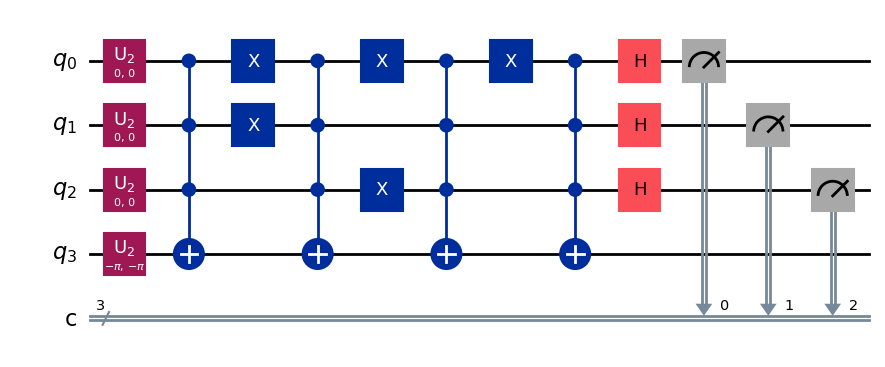

In [3]:
simulator = AerSimulator()
qct = transpile(qc, backend=simulator)
qct.draw("mpl")